In [1]:
import pandas as pd
from pylab import rcParams

In [2]:
dataframe = pd.read_csv("EEG_computations1.csv")
dataframe

,pat_id,psd_1,psd_2,psd_3,psd_4,psd_5,psd_6,psd_7,psd_8,psd_9,...,sampent_32,sampent_33,sampent_34,sampent_35,sampent_36,sampent_37,sampent_38,sampent_39,sampent_40,class
0,4,645.421802,1244.137107,1342.573257,1377.626642,1191.858023,916.585764,631.944529,348.472667,205.715373,...,0.831088,1.255300,1.158907,1.277339,1.240665,0.836394,1.298104,0.777171,1.227535,0
1,4,647.570547,1207.246409,1261.396234,1253.218814,1030.154628,805.928995,595.934811,343.724728,210.889603,...,1.180914,1.246011,1.215797,1.240653,0.955632,1.077463,1.178307,1.086454,1.133585,0
2,4,724.363206,1330.406693,1312.083779,1283.059901,1094.287751,907.385618,695.820322,419.915616,255.160034,...,1.115960,1.343804,1.228263,1.408782,1.059234,1.163180,1.190991,1.322667,1.269843,0
3,4,785.063504,1528.031200,1679.275159,1709.930897,1433.600885,1098.581952,774.572496,437.289908,257.290732,...,1.177169,1.232936,1.132899,1.283933,1.189928,1.016720,0.999399,1.228235,1.407448,0
4,4,682.674948,1338.604460,1517.318550,1614.032264,1374.831555,1052.713192,720.388417,408.701591,251.571574,...,1.301709,1.335298,1.228710,1.247957,1.282280,1.218595,1.225250,1.291365,1.293883,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,28,29740.629379,56201.896357,58789.459897,58028.890750,50645.237424,44097.258746,40037.136809,36816.435836,31926.126593,...,1.555706,1.663974,1.298966,1.162820,1.581927,1.450756,1.607178,1.641080,1.345645,1
926,28,40827.686054,76808.102703,82034.025274,80124.963121,69929.526081,61915.845015,53208.289164,44131.671631,34008.362223,...,1.450620,1.583878,1.084191,0.745166,1.543272,1.323299,1.604390,1.501338,0.924893,1
927,28,42196.772223,78604.719259,79353.665675,71321.481339,57166.174542,48206.932984,40824.007652,38185.795548,34209.113003,...,1.246348,1.314960,0.429900,0.183363,1.393888,1.476062,1.512985,1.247674,0.567492,1
928,28,51205.111501,91749.951480,91156.325678,81017.080285,67119.643844,59567.532868,48705.533831,37721.211645,29512.313342,...,1.358135,1.363696,0.616864,0.281217,1.265886,1.367786,1.510821,1.333219,0.551830,1


In [3]:
df1 = dataframe.copy()

In [4]:
psd_col = df1.loc[: , "psd_1":"psd_14"]
hc_col = df1.loc[: , "hjorthc_1":"hjorthc_40"]
hm_col = df1.loc[: , "hjorthm_1":"hjorthm_40"]
hurst_col = df1.loc[: , "hurst_1":"hurst_40"]
fisher_col = df1.loc[: , "fisher_1":"fisher_40"]
hfd = df1.loc[: , "hfd_1":"hfd_40"]
sampent_col = df1.loc[: , "sampent_1":"sampent_40"]
df1['psd_mean'] = psd_col.mean(axis=1)
df1['hc_col'] = hc_col.mean(axis=1)
df1['hm_col'] = hm_col.mean(axis=1)
df1['hurst_col'] = hurst_col.mean(axis=1)
df1['fisher_col'] = fisher_col.mean(axis=1)
df1['hfd'] = hfd.mean(axis=1)
df1['sampent_col'] = sampent_col.mean(axis=1)

<Axes: xlabel='Patient IDs', ylabel='Hurst Exponent Values'>

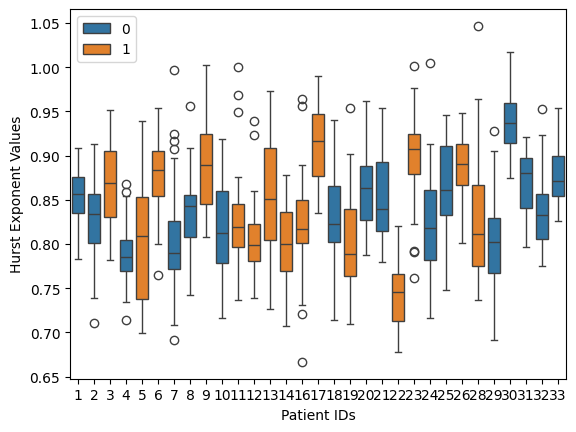

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel("Patient IDs")
ax.set_ylabel("Hurst Exponent Values")
plt.style.use("fast")
rcParams['figure.figsize'] = 12, 8
sns.boxplot(y = df1['hurst_col'].values, x = df1['pat_id'].values, data = df1, hue = df1['class'].values, ax = ax)

In [6]:
X = dataframe.iloc[:,1:-1]
Y = dataframe.iloc[:, -1]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [26]:
import pickle

with open('models/scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

In [8]:
scaled

array([[4.72107584e-04, 6.59707839e-04, 1.06276116e-03, ...,
        7.68329043e-01, 3.99077062e-01, 6.38594932e-01],
       [5.00958744e-04, 3.51898002e-04, 2.01841491e-04, ...,
        6.82007669e-01, 5.88020631e-01, 5.76314090e-01],
       [1.53205247e-03, 1.37952689e-03, 7.39406218e-04, ...,
        6.91147223e-01, 7.32325192e-01, 6.66641437e-01],
       ...,
       [5.58381385e-01, 6.46143515e-01, 8.28406276e-01, ...,
        9.23164193e-01, 6.86511521e-01, 2.01043961e-01],
       [6.79336204e-01, 7.55825143e-01, 9.53578914e-01, ...,
        9.21605133e-01, 7.38771230e-01, 1.90661215e-01],
       [3.63362079e-01, 4.36387427e-01, 6.02529145e-01, ...,
        8.89652668e-01, 8.34594138e-01, 8.63559281e-01]])

In [9]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
925    1
926    1
927    1
928    1
929    1
Name: class, Length: 930, dtype: int64

In [10]:
dataframe.describe()

,pat_id,psd_1,psd_2,psd_3,psd_4,psd_5,psd_6,psd_7,psd_8,psd_9,...,sampent_32,sampent_33,sampent_34,sampent_35,sampent_36,sampent_37,sampent_38,sampent_39,sampent_40,class
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,...,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,16.741935,8291.100894,15045.977012,14903.022555,13274.207132,10363.294203,8623.179898,7145.370186,5546.784354,4268.359542,...,1.081401,1.077624,1.035868,1.074182,1.096957,1.091252,1.078720,1.089867,1.081050,0.483871
std,9.653751,9623.604885,16931.659797,16325.487682,14464.263487,12038.051916,10737.554342,9331.345065,7794.206229,6327.455239,...,0.285835,0.288845,0.274888,0.275960,0.290453,0.282569,0.257759,0.282576,0.276887,0.500009
min,1.000000,610.260695,1165.071789,1242.364387,1170.523117,615.182501,440.103280,351.234807,297.415531,205.715373,...,0.193259,0.119287,0.193158,0.082825,0.146006,0.152785,0.231814,0.123919,0.264219,0.000000
25%,8.000000,2875.523627,5278.285350,5204.853814,4390.163267,3047.192106,2296.325411,1789.404781,1176.933062,863.421414,...,0.889004,0.889179,0.862642,0.905054,0.913109,0.900236,0.915591,0.892346,0.894849,0.000000
50%,17.000000,4636.550371,8389.164068,8093.961643,6945.878103,5053.493301,4034.958035,3240.424475,2472.559750,1860.353670,...,1.112056,1.103804,1.047740,1.087776,1.110479,1.111336,1.094964,1.099678,1.101938,0.000000
75%,25.000000,9276.221867,17634.649201,18702.682763,17942.566351,13988.994370,11388.513568,9087.957756,6975.129530,5093.430777,...,1.276000,1.280762,1.231702,1.268287,1.305049,1.303397,1.271266,1.311466,1.290680,1.000000
max,33.000000,75087.155180,121014.061400,95533.418840,84521.975220,78548.277677,70656.973125,60098.210405,48264.852450,47664.585960,...,1.764379,1.756749,1.685477,1.736654,1.763503,1.761067,1.619618,1.760826,1.772712,1.000000


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, test_size=0.1, stratify = Y, random_state=1)

In [12]:
Y_train

681    1
904    1
258    0
184    0
742    1
      ..
83     0
19     0
331    0
491    1
715    1
Name: class, Length: 837, dtype: int64

In [13]:
Y_test

560    1
707    1
474    0
510    1
254    0
      ..
803    1
690    1
739    1
926    1
654    1
Name: class, Length: 93, dtype: int64

In [14]:
import keras
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(254,)),
    keras.layers.Dense(200, activation=tf.nn.relu),
	  keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

/Users/dipenshu/Desktop/Work/Qriocity/C321/env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 254)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        51,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,401 (357.04 KB)

 Trainable params: 91,401 (357.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss="mse",
              metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, epochs=5, batch_size=1, verbose=1)

Epoch 1/5
837/837 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - accuracy: 0.4956 - loss: 0.2781
Epoch 2/5
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5695 - loss: 0.2427
Epoch 3/5
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.6453 - loss: 0.2198
Epoch 4/5
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.7912 - loss: 0.1558
Epoch 5/5
837/837 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.8543 - loss: 0.1111


In [18]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7860 - loss: 0.1230 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


<Axes: xlabel='Predicted', ylabel='Actual'>

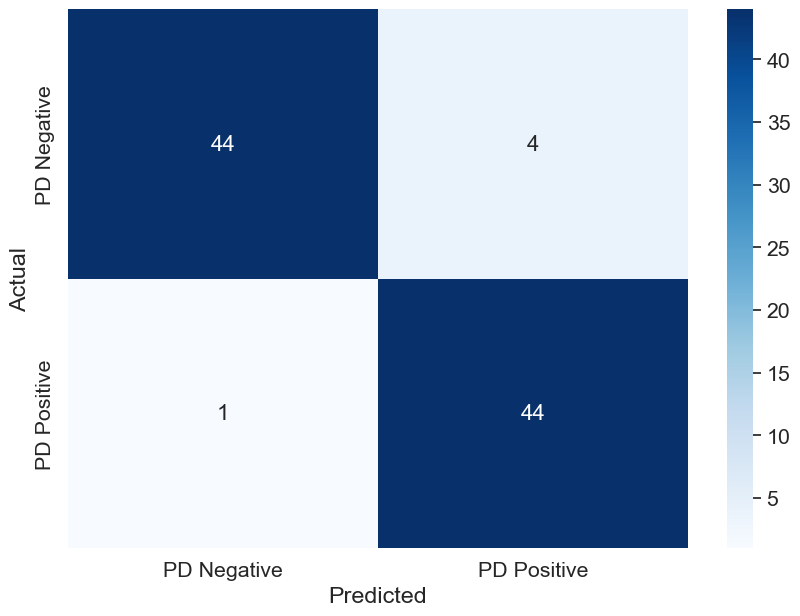

In [19]:
import matplotlib.pyplot as plt
pred = model.predict(X_test)
import numpy as np
y_pred_nn = (pred > 0.8).astype(np.float32)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred_nn)
df_cm = pd.DataFrame(cm, columns=["PD Negative", "PD Positive"], index = np.unique(["PD Negative", "PD Positive"]))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt = "g")# font size

In [20]:
Y_test.value_counts()

class
0    48
1    45
Name: count, dtype: int64

In [22]:
import sklearn
sklearn.metrics.confusion_matrix(Y_test, y_pred_nn)

array([[44,  4],
       [ 1, 44]])

In [23]:
Y_test.value_counts()

class
0    48
1    45
Name: count, dtype: int64

In [24]:
model.save('models/model.h5')